In [627]:
import rebound
import reboundx
import numpy as np
sim = rebound.Simulation()

m=5.e-5
e0=0
p=2
q=1
delta=5.e-2
sim.add(m=1.)
sim.add(m=m,a=1., e=e0)
sim.add(m=m,P=(p+q)/p*sim.particles[1].P*(1.+delta), e=e0, f=np.pi)
sim.move_to_com() # Moves to the center of momentum frame
ps = sim.particles

In [628]:
rebx = reboundx.Extras(sim)
params = rebx.add("modify_orbits_forces")

In [629]:
tau_a = 1e5
K = 100
ps[1].params["tau_a"] = tau_a
ps[2].params["tau_e"] = -tau_a/K
ps[1].params["tau_e"] = -tau_a/K

In [630]:
def wrap(val):
    while val < 0:
        val += 2*np.pi
    while val > 2*np.pi:
        val -= 2*np.pi
    return val*180/np.pi

In [631]:
tmax = 1.e5
Nout = 1000
pratio, phi1, phi2, e1 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0,tmax,Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    pratio[i] = ps[2].P/ps[1].P
    phi1[i] = wrap((p+q)*ps[2].l - p*ps[1].l - q*ps[1].pomega)
    e1[i] = ps[2].e

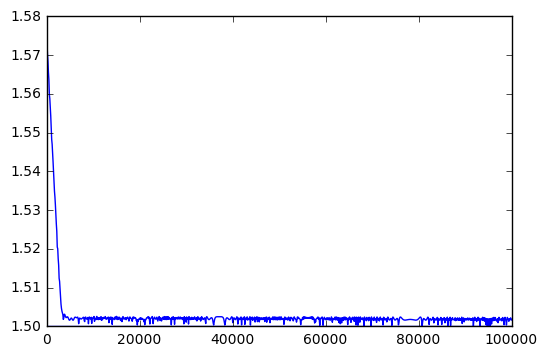

In [632]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, pratio)
ax.axhline((p+q)/p)

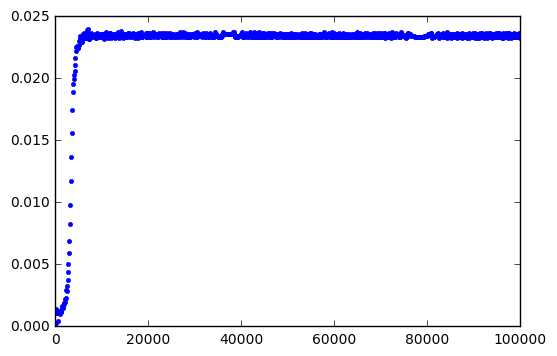

In [633]:
fig, ax = plt.subplots()
ax.plot(times, e1, '.')

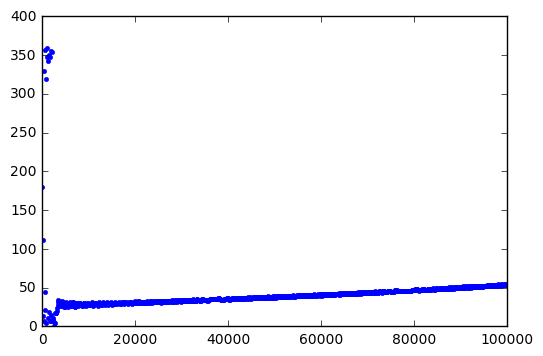

In [634]:
fig, ax = plt.subplots()
ax.plot(times, phi1, '.')

In [635]:
tmax = 1.e5
Nout = 1000
pratio, phi1, phi2, e1 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.linspace(tmax,2*tmax,Nout)
ps[1].params["tau_a"] = np.inf
for i, time in enumerate(times):
    sim.integrate(time)
    pratio[i] = ps[2].P/ps[1].P
    phi1[i] = wrap((p+q)*ps[2].l - p*ps[1].l - q*ps[1].pomega)
    e1[i] = ps[2].e

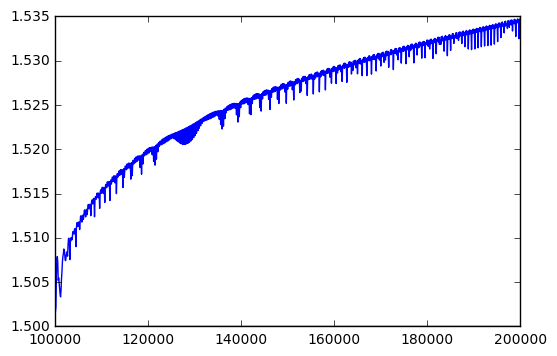

In [636]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(times, pratio)
ax.axhline((p+q)/p)

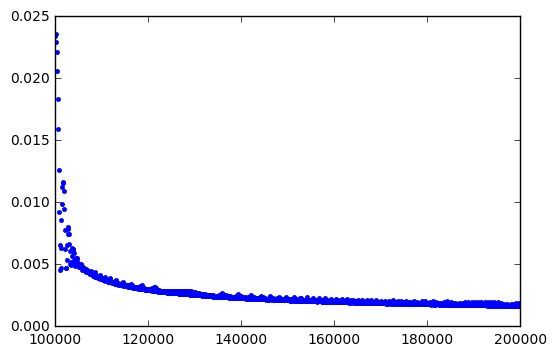

In [643]:
fig, ax = plt.subplots()
ax.plot(times, e1, '.')
#ax.set_xscale('log')
#ax.set_yscale('log')

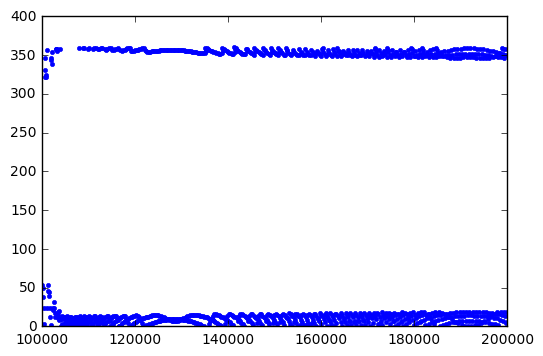

In [638]:
fig, ax = plt.subplots()
ax.plot(times, phi1, '.')